So to simulate the photons path, start at r=0, calculate the electron density and from that the mean free path. Draw a random number from the exponential distribution with a scale of the mean free path. And update r. Calculate the new electron density, the new mean free path and the angle the photon was scatter by (just 0 to 180 because we only care about relative to r) and then draw a new random number from the exponential distribution with the new mean free path. Note you must keep track of both r, the distance from the Sun’s center and s, the total distance traveled by the photon, as the total distance is the time, t = cs.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sigmaT=6.652e-29 #6.652e-25 cm^2 converted to m^2
ne=1e26 #1e20 cm^-3 converted to m^-3
width=1e3 #1km converted to m
c=3e8 #speed of light in meters per second

In [5]:
def mfp(n,sigma): #mean free path
    return 1/(n*sigma)

In [6]:
slab_mfp=mfp(ne,sigmaT)

In [7]:
def transform(z,l): #z is the random number and l is the mean free path
    mu=1/l
    return -(1/mu)*np.log(1-z) #transformation of exponential equation

first just do the particle bouncing along the r-axis 10 times without worrying about angle or whether or not it has escaped the slab

In [9]:
N=10
Rs=np.zeros(N)
for i in range(1,N): #starting at the second element
    z=np.random.rand() #get single random number
    x=transform(z,slab_mfp) #transform it into the right distribution
    Rs[i]=Rs[i-1]+x #new position is previous position plus change 

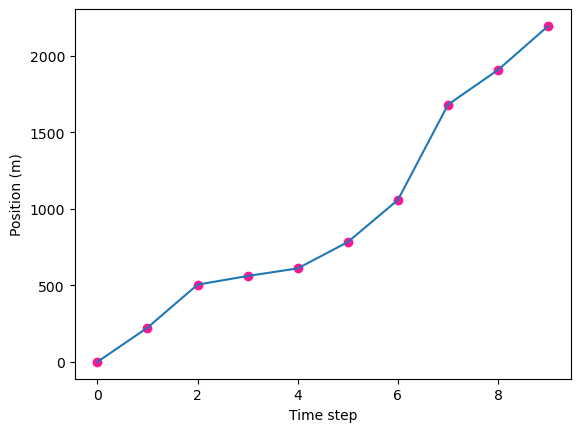

In [10]:
plt.plot(np.arange(N),Rs)
plt.scatter(np.arange(N),Rs,color='deeppink')
plt.xlabel('Time step') #not actually time since the different travel distances will take different amounts of time
plt.ylabel('Position (m)')
plt.show()

Okay so the distance is increasing each time step by a random amount dictated by the exponential distribution. Now add in the angle part. Each iteration, draw an angle from 0 to 180/pi. 0 is in positive r direction and 180 is in negative r direction. Don't need to add it to the previous angle because that will still just result in a random angle between 0 and 180 (after wrapping around the angle like 195 is 15). The position modification is then x*cos(theta). Still not worrying about boundaries.

In [12]:
#plt.scatter(np.arange(1000),np.random.rand(1000)*np.pi) #confirming that this works for scaling the uniform distribution between 0 and pi

In [13]:
N=10
Rs=np.zeros(N)
for i in range(1,N): #starting at the second element
    z=np.random.rand() #get single random number
    x=transform(z,slab_mfp) #transform it into the right distribution
    theta=np.random.rand()*np.pi #get a single random number between 0 and pi
    rdelt=x*np.cos(theta) #change in r is x*cos(theta)
    #print(x, theta, rdelt)
    Rs[i]=Rs[i-1]+rdelt #new position is previous position plus change 

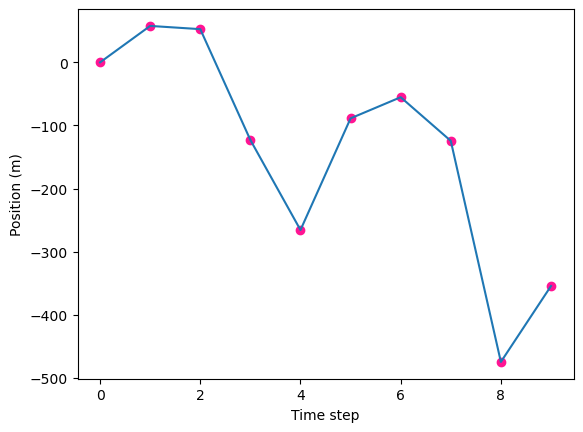

In [14]:
plt.plot(np.arange(N),Rs)
plt.scatter(np.arange(N),Rs,color='deeppink')
plt.xlabel('Time step') #not actually time since the different travel distances will take different amounts of time
plt.ylabel('Position (m)')
plt.show()

This is correctly figuring out the position in the slab for scattering. Now add in a reset to position zero if the new position is negative. This is perhaps a lazy way of doing it, instead of having the photon be relaunched or bouncing off a flat wall or something, but this won't be relevant in the next version, since the photon will just keep going until it escapes at either r or -r, so it doesn't really matter.

In [16]:
N=10
Rs=np.zeros(N)
for i in range(1,N): #starting at the second element
    z=np.random.rand() #get single random number
    x=transform(z,slab_mfp) #transform it into the right distribution
    theta=np.random.rand()*np.pi #get a single random number between 0 and pi
    rdelt=x*np.cos(theta) #change in r is x*cos(theta)
    Rs[i]=Rs[i-1]+rdelt #new position is previous position plus change 
    #print(Rs[i-1], Rs[i], x, theta, rdelt)
    if Rs[i]<0:
        Rs[i]=0 #if the photon dips below the bottom of the slab, it just resets
        #print(Rs[i])

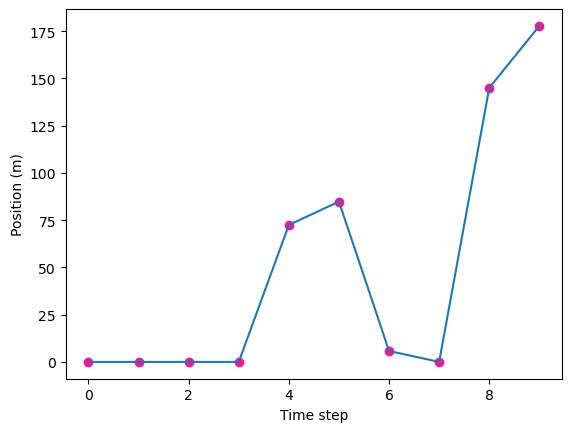

In [17]:
plt.plot(np.arange(N),Rs)
plt.scatter(np.arange(N),Rs,color='deeppink')
plt.xlabel('Time step') #not actually time since the different travel distances will take different amounts of time
plt.ylabel('Position (m)')
plt.show()

Now convert this to a while loop, where it will keep going until either it escapes the slab or a maximum number of iterations is reached.

In [19]:
maxits=10000
escapestep=0
Rs=np.zeros(maxits)
for i in range(1,maxits): #starting at the second element
    z=np.random.rand() #get single random number
    x=transform(z,slab_mfp) #transform it into the right distribution
    theta=np.random.rand()*np.pi #get a single random number between 0 and pi
    rdelt=x*np.cos(theta) #change in r is x*cos(theta)
    Rs[i]=Rs[i-1]+rdelt #new position is previous position plus change 
    #print(Rs[i-1], Rs[i], x, theta, rdelt)
    if Rs[i]<0:
        Rs[i]=0 #if the photon dips below the bottom of the slab, it just resets
        #print(Rs[i])
    if Rs[i]>width:
        print(f'Photon escape at time step {i}.')
        escapestep=i
        break

Photon escape at time step 17.


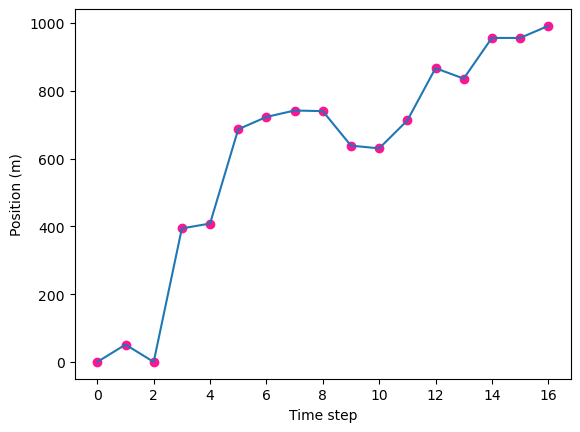

In [20]:
plt.plot(np.arange(escapestep),Rs[:escapestep])
plt.scatter(np.arange(escapestep),Rs[:escapestep],color='deeppink')
plt.xlabel('Time step') #not actually time since the different travel distances will take different amounts of time
plt.ylabel('Position (m)')
plt.show()

Okay I realized that the first step forward should not have an angle.

In [22]:
maxits=10000
escapestep=0
Rs=np.zeros(maxits)
for i in range(1,maxits): #starting at the second element
    z=np.random.rand() #get single random number
    x=transform(z,slab_mfp) #transform it into the right distribution
    if i==1: #just go straight on first iteration
        theta=0
    else:
        theta=np.random.rand()*np.pi #get a single random number between 0 and pi
    rdelt=x*np.cos(theta) #change in r is x*cos(theta)
    Rs[i]=Rs[i-1]+rdelt #new position is previous position plus change 
    #print(Rs[i-1], Rs[i], x, theta, rdelt)
    if Rs[i]<0:
        Rs[i]=0 #if the photon dips below the bottom of the slab, it just resets
        #print(Rs[i])
    if Rs[i]>width:
        print(f'Photon escape at time step {i}.')
        escapestep=i
        break

Photon escape at time step 110.


Now make this into an actual while looping instead of just breaking the for loop.

In [24]:
maxits=10000
Rs=np.zeros(1) #only one zero
numits=1 #starting at the second element
while Rs[numits-1]<width: #while the photon is still inside the slab
    if numits>=maxits: #emergency escape to prevent it hanging
        print(f'Maximum ({maxits}) iterations reached without photon escaping the slab.')
        break
    z=np.random.rand() #get single random number
    x=transform(z,slab_mfp) #transform it into the right distribution
    if numits==1: #just go straight on first iteration
        theta=0
    else:
        theta=np.random.rand()*np.pi #get a single random number between 0 and pi
    rdelt=x*np.cos(theta) #change in r is x*cos(theta)
    Rs=np.append(Rs,Rs[numits-1]+rdelt) #new position is previous position plus change 
    #print(Rs[numits-1], Rs[numits], x, theta, rdelt)
    if Rs[numits]<0:
        Rs[numits]=0 #if the photon dips below the bottom of the slab, it just resets
    numits+=1

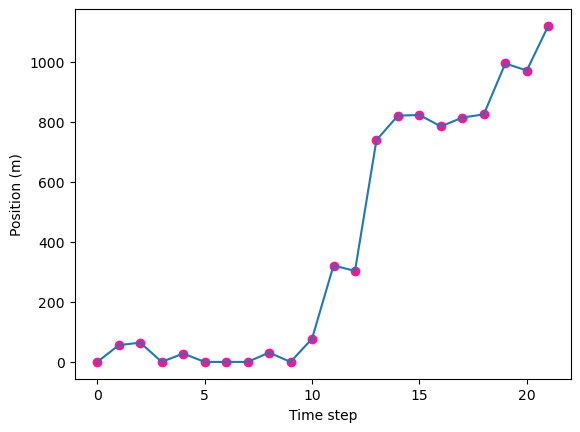

In [25]:
plt.plot(np.arange(Rs.size),Rs)
plt.scatter(np.arange(Rs.size),Rs,color='deeppink')
plt.xlabel('Time step') #not actually time since the different travel distances will take different amounts of time
plt.ylabel('Position (m)')
plt.show()

Now need to figure out how long this took instead of just how many time steps.

In [27]:
maxits=10000
Rs=np.zeros(1) #only one zero
Xs=np.zeros(1) #this will be the total distance traveled
numits=1 #starting at the second element
while Rs[numits-1]<width: #while the photon is still inside the slab
    if numits>=maxits: #emergency escape to prevent it hanging
        print(f'Maximum ({maxits}) iterations reached without photon escaping the slab.')
        break
    
    z=np.random.rand() #get single random number
    x=transform(z,slab_mfp) #transform it into the right distribution
    Xs=np.append(Xs,Xs[numits-1]+x)
    
    if numits==1: #just go straight on first iteration
        theta=0
    else:
        theta=np.random.rand()*np.pi #get a single random number between 0 and pi
    rdelt=x*np.cos(theta) #change in r is x*cos(theta)
    Rs=np.append(Rs,Rs[numits-1]+rdelt) #new position is previous position plus change 

    if Rs[numits]<0:
        Rs[numits]=0 #if the photon dips below the bottom of the slab, it just resets
    numits+=1
Ts=Xs/c

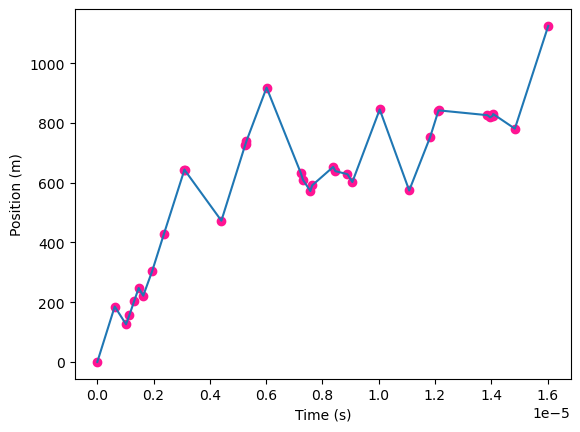

In [28]:
plt.plot(Ts,Rs)
plt.scatter(Ts,Rs,color='deeppink')
plt.xlabel('Time (s)') 
plt.ylabel('Position (m)')
plt.show()

Now try to animate this thing. I just asked Claude to do it because I wanted to focus on the sun stuff and not the animation.

In [50]:
import matplotlib.animation as animation

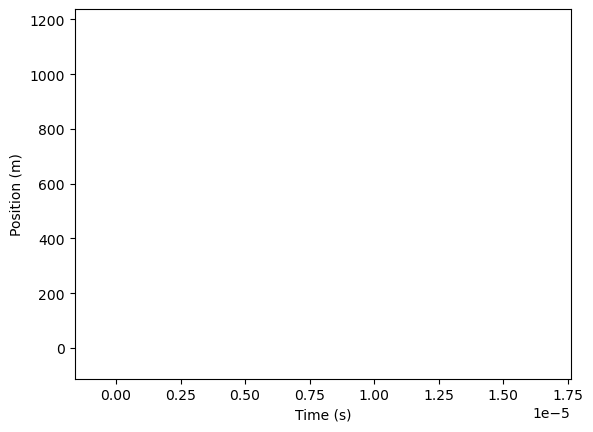

In [67]:
# Create figure and axis
fig, ax = plt.subplots()

# Set up the plot limits and labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (m)')
ax.set_xlim(min(Ts) - 0.1 * (max(Ts) - min(Ts)), max(Ts) + 0.1 * (max(Ts) - min(Ts)))
ax.set_ylim(min(Rs) - 0.1 * (max(Rs) - min(Rs)), max(Rs) + 0.1 * (max(Rs) - min(Rs)))

# # Add the horizontal line if needed
# if slaborsun == 'slab':
#     ax.axhline(y=R, color='black', zorder=1)

# Initialize empty line and scatter plot
line, = ax.plot([], [], color='lightpink', marker='.', zorder=2)
scatter = ax.scatter([], [], color='deeppink', zorder=3)

# Initialization function
def init():
    line.set_data([], [])
    scatter.set_offsets(np.empty((0, 2)))  # Fixed: use empty array with proper shape
    return line, scatter

# Animation function
def animate(frame):
    # Update line data up to current frame
    line.set_data(Ts[:frame+1], Rs[:frame+1])
    # Update scatter data up to current frame
    scatter.set_offsets(np.column_stack([Ts[:frame+1], Rs[:frame+1]]))  # Fixed: proper format
    # Update title with current frame number
    ax.set_title(f'Photon escapes the {'slab'} in {numits} time steps (frame {frame+1}/{len(Ts)})')
    return line, scatter

# Create animation
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                              frames=len(Ts), interval=50, 
                              blit=True, repeat=True)

# Display or save
plt.show()

#anim.save('photon_animation.gif', writer='pillow', fps=20)